In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread
from tifffile import imsave
from skimage.util import img_as_float
from skimage.color import gray2rgb

In [2]:
blur = {}
blur['840006_0066'] = (12100, 13000, 2500, 3400)  # (row_min, row_max, col_min, col_max)
blur['840096_0086-1'] = (9500, 10300, 23150, 23950)
blur['840005_0115'] = (1700, 2400, 4800, 5500)
blur['840005_0104-1'] = (14700, 15600, 16700, 17600)
blur['840069_0048-1'] = (12900, 13600, 11800, 12500)
blur['840031_0055'] = (4200, 4800, 12200, 12800)
blur['840096_0086-2'] = (11800, 12500, 24000, 24700)
blur['840069_0053'] = (10700, 11400, 14500, 15200)
blur['840005_0104-2'] = (1620, 2580, 8070, 9030)
blur['840063_0110'] = (11150, 12850, 6200, 7900)
blur['840003_0039'] = (3200, 3600, 19250, 19650)
blur['840069_0048-2'] = (11700, 12900, 11900, 13100)

In [3]:
# output dir
out_dir = '../output/Fig1g-OnlineSupFig1d'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

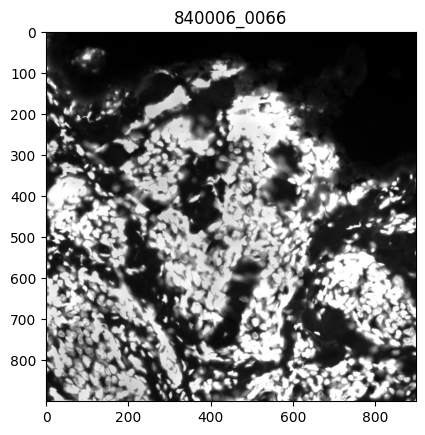

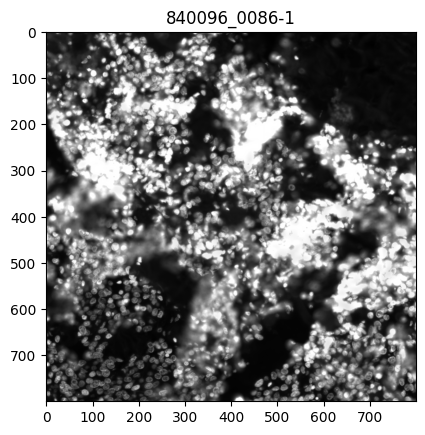

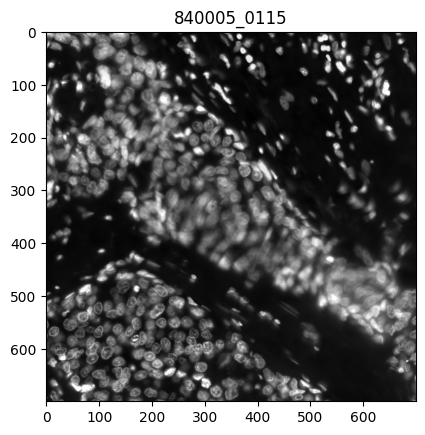

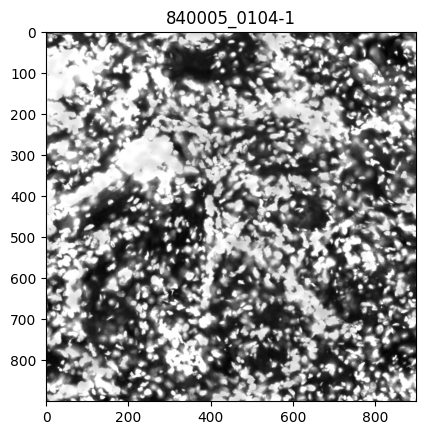

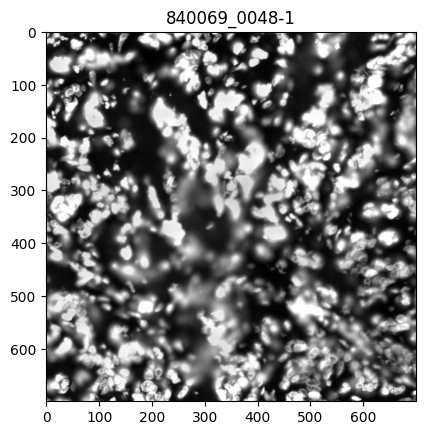

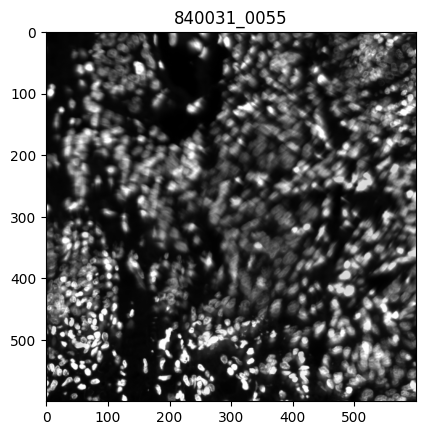

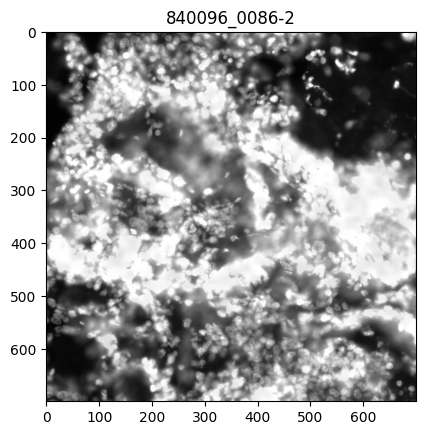

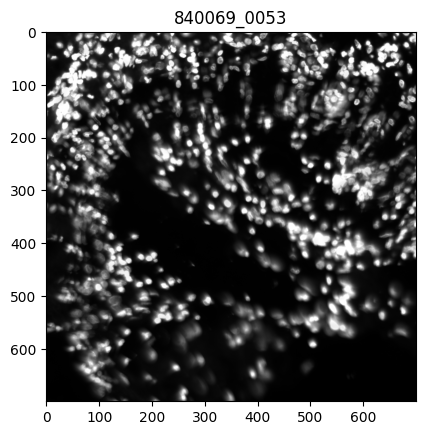

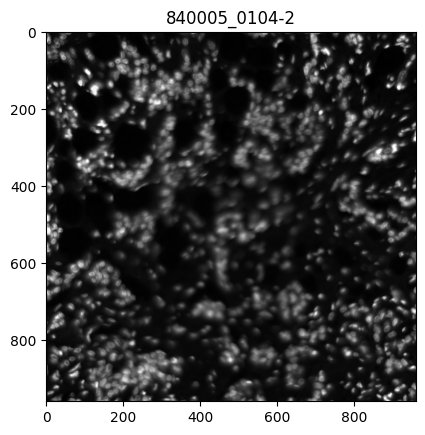

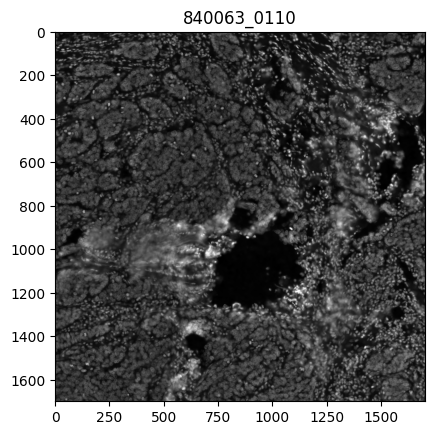

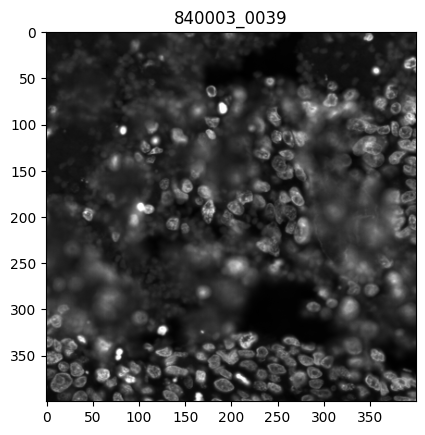

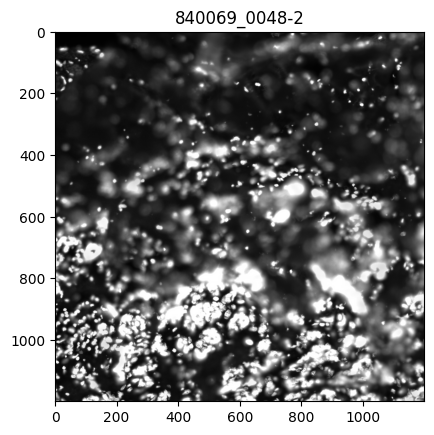

In [4]:
for k, v, in blur.items():
    
    k2 = k.split('-')[0]
    
    # assign file path to TOPACIO OME-TIFF
    img_path = (f'/Volumes/T7 Shield/cylinter_input/TOPACIO_FINAL/tif/{k2}.ome.tif')
    
    dna = imread(img_path, key=0)
    dna = img_as_float(dna)
    dna_crop = dna[v[0]:v[1], v[2]:v[3]]
    dna_crop = (dna_crop - np.min(dna_crop)) / (np.max(dna_crop) - np.min(dna_crop))  # normalize 0-1
    
    bottom_cutoff = 0.0
    top_cutoff = 1.0
    dna_crop = np.clip(dna_crop, bottom_cutoff, top_cutoff)
    dna_crop = (dna_crop - np.min(dna_crop)) / (np.max(dna_crop) - np.min(dna_crop))  # normalize 0-1

    dna_crop_rgb = gray2rgb(dna_crop)
    
    plt.imshow(dna_crop_rgb, cmap='magma')
    plt.title(k)
    plt.savefig(os.path.join(out_dir, f'{k}.png'), dpi=1000)
    plt.show()
    plt.close('all')